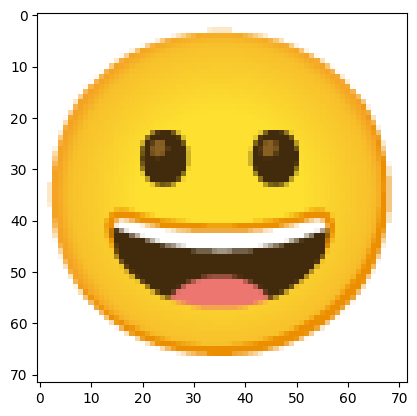

In [51]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from PIL import Image
import io
import os
import glob
import base64
import cv2
from torchvision import transforms

emoji = pd.read_csv('./full_emoji.csv')
emoji.head()

base64_decoded = base64.b64decode(emoji['Google'][0].split(',')[-1])
image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')

plt.imshow(image)

In [42]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(128),
    lambda x:x[:3],
    transforms.ToPILImage("RGB")
    ]
)


In [45]:
company = "Apple"
for i in emoji.index:
    row = emoji.iloc[i]
    if row[company] is np.NaN:
        continue
    base64_decoded = base64.b64decode(row[company].split(",")[-1])
    image = Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
    transformed_image = transform(image)
    transformed_image.save(f"./data/Apple/{i}.jpg")


/home/owl/.conda/envs/diffusion/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
